# Atividade: Neurônio Artificial
**INSTITUTO FEDERAL DE MINAS GERIAS**
*Departamento de Engenharia e Computação*

**Professor:** Ciniro Nametala

**Aluno:** Euler Gomes


In [1]:
#importação das bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

### Exercício 1: Neurônio

In [2]:
#função neurônio
def neuronio(x1,x2, w0, w1, w2, bias):
    u = x1*w1 + x2*w2 + bias*w0
    if u < 0: #função degrau
        return 0
    else:
        return 1

In [3]:
#leitura de dados
dados = pd.read_csv('amostrabivariada.csv', sep=';', decimal=',')

#convertendo para float se necessario
dados['x'] = pd.to_numeric(dados['x'], errors='coerce')
dados['y'] = pd.to_numeric(dados['y'], errors='coerce')

dados.head() #primeiras 5 linhas do dataset

,x,y
0,1.183988,1.832880
1,1.523565,2.293337
2,2.199241,2.342880
3,2.768052,2.179136
4,2.165374,1.888445


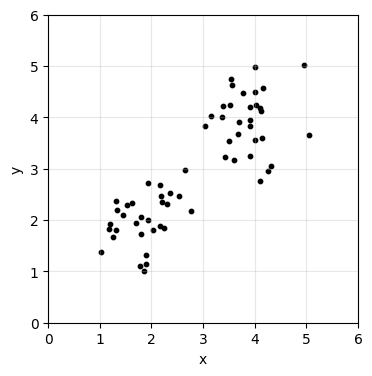

In [4]:
#criando o grafico de dispersão
plt.figure(figsize=(4,4))
plt.scatter(dados['x'], dados['y'], c='black', s=10)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=.3)
plt.show()

In [5]:
#instanciacao dos pesos e do bias
w0 = -6
w1 = -1
w2 = -1
bias = -1

#aplicando a funcao neuronio
classificacoes = []
for i, linha in dados.iterrows():
    classe = neuronio(linha['x'], linha['y'],w0,w1,w2, bias)
    classificacoes.append(classe)

#adicionando as classificacoes ao dataframe
dados['classe'] = classificacoes
dados.head()

,x,y,classe
0,1.183988,1.832880,1
1,1.523565,2.293337,1
2,2.199241,2.342880,1
3,2.768052,2.179136,1
4,2.165374,1.888445,1


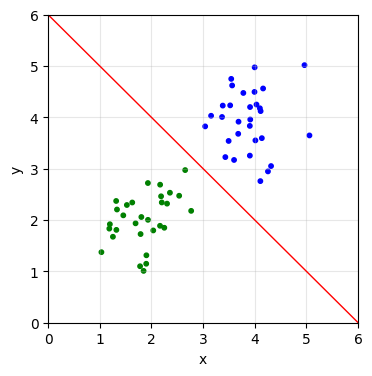

In [6]:
plt.figure(figsize=(4,4))
cores = ['blue' if c == 0 else 'green' for c in dados['classe']]
plt.scatter(dados['x'], dados['y'], c=cores, s=10)

#gerando reta de separacao
eixox = np.linspace(0,6,100)
eixoy = (w0 * bias) - eixox
plt.plot(eixox, eixoy, 'r-', linewidth=1)

plt.xlim(0,6)
plt.ylim(0,6)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=.3)
plt.show()